In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("cleaned_ebay_deals.csv")

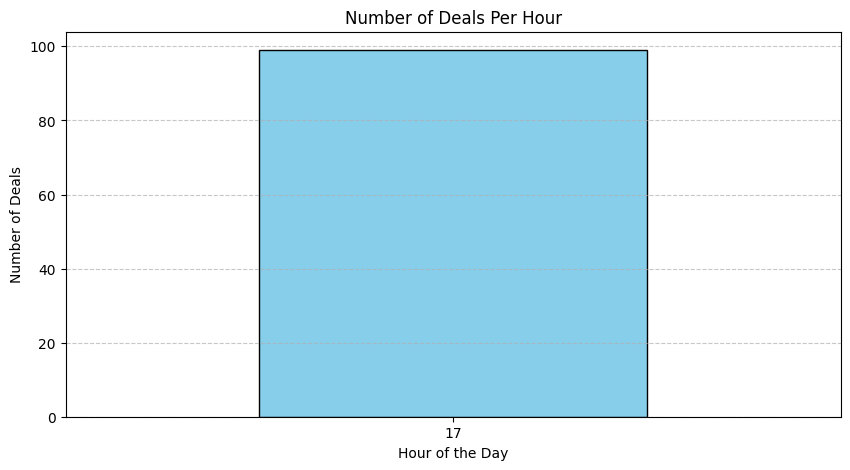

In [3]:
df["timestamp"] = pd.to_datetime(df["timestamp"], errors='coerce')

df = df.dropna(subset=["timestamp"])

df["hour"] = df["timestamp"].dt.hour

hourly_deals = df.groupby("hour").size()

# Plot the bar chart
plt.figure(figsize=(10, 5))
hourly_deals.plot(kind="bar", color="skyblue", edgecolor="black")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Deals")
plt.title("Number of Deals Per Hour")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

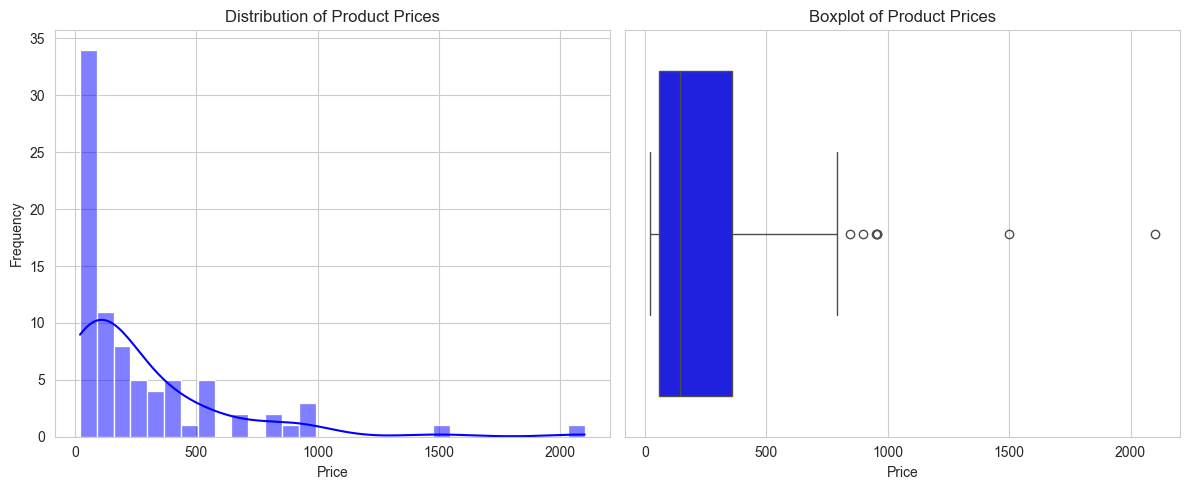

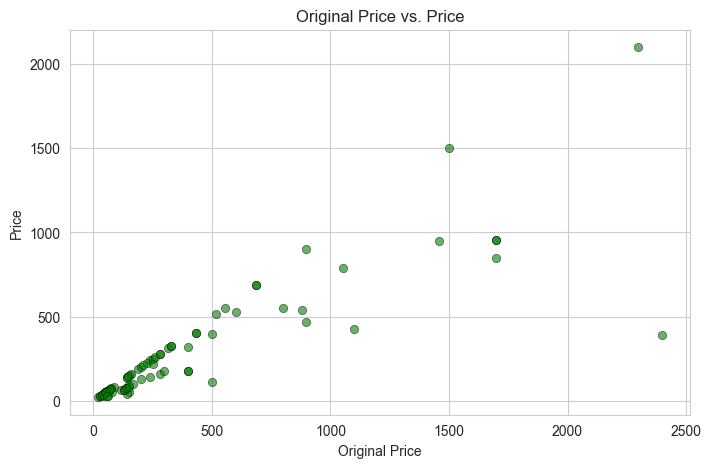

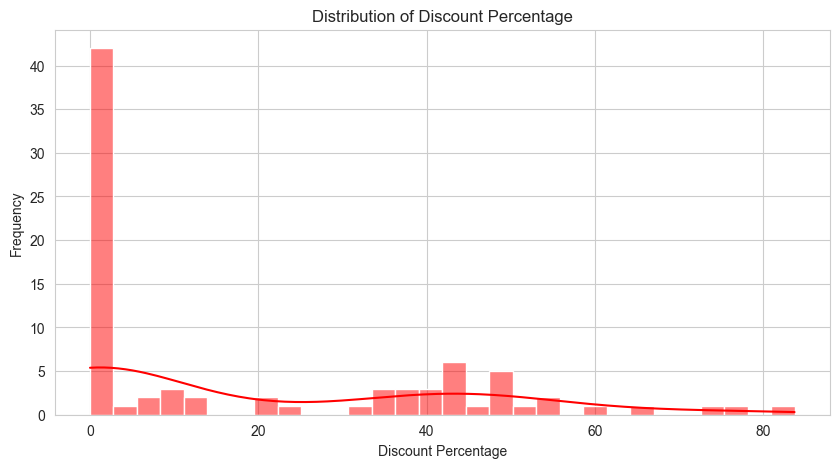

In [4]:
df = df.dropna(subset=["price", "original_price", "discount_percentage"])

# Set Seaborn style for better visuals
sns.set_style("whitegrid")

# Histogram & Boxplot for Price Distribution
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df["price"], bins=30, kde=True, color="blue")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Distribution of Product Prices")

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df["price"], color="blue")
plt.xlabel("Price")
plt.title("Boxplot of Product Prices")

plt.tight_layout()
plt.show()

# Scatter Plot: Original Price vs Price
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["original_price"], y=df["price"], alpha=0.6, color="green", edgecolor="black")
plt.xlabel("Original Price")
plt.ylabel("Price")
plt.title("Original Price vs. Price")
plt.grid(True)
plt.show()

# Distribution of Discount Percentage
plt.figure(figsize=(10, 5))
sns.histplot(df["discount_percentage"], bins=30, kde=True, color="red")
plt.xlabel("Discount Percentage")
plt.ylabel("Frequency")
plt.title("Distribution of Discount Percentage")
plt.grid(True)
plt.show()

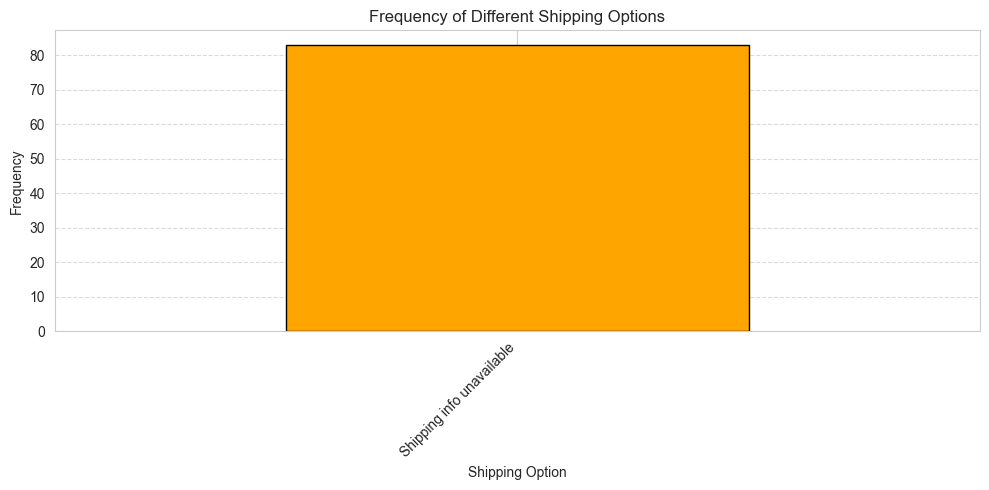

shipping
Shipping info unavailable    83
Name: count, dtype: int64


In [11]:
# Count the frequency of different shipping options 
shipping_counts = df["shipping"].value_counts()

# Plot a bar chart showing the frequency of shipping options
plt.figure(figsize=(10, 5))
shipping_counts.plot(kind="bar", color="orange", edgecolor="black")
plt.xlabel("Shipping Option")
plt.ylabel("Frequency")
plt.title("Frequency of Different Shipping Options")
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

# Print shipping counts for reference
print(shipping_counts)

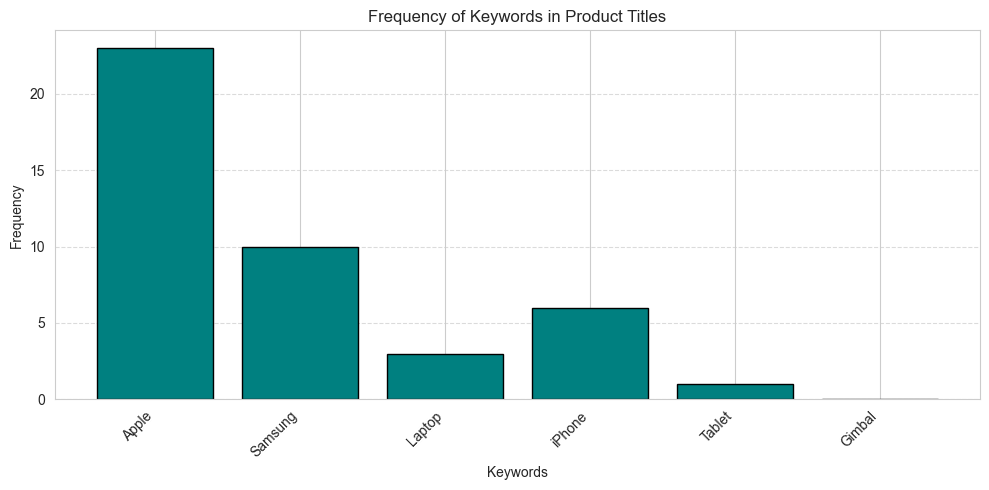

Keyword frequencies in product titles:
{'Apple': np.int64(23), 'Samsung': np.int64(10), 'Laptop': np.int64(3), 'iPhone': np.int64(6), 'Tablet': np.int64(1), 'Gimbal': np.int64(0)}


In [8]:
keywords = ["Apple", "Samsung", "Laptop", "iPhone", "Tablet", "Gimbal"]

# Function to count occurrences of keywords in the title column (case-insensitive)
def count_keywords_in_titles(keywords, titles):
    keyword_counts = {}
    for keyword in keywords:
        # Count occurrences, case insensitive
        keyword_counts[keyword] = titles.str.contains(keyword, case=False, na=False).sum()
    return keyword_counts

# Count the occurrences of each keyword in the title column
keyword_counts = count_keywords_in_titles(keywords, df["title"])

# --- ⿢ Visualize the keyword frequencies using a bar chart ---
plt.figure(figsize=(10, 5))
plt.bar(keyword_counts.keys(), keyword_counts.values(), color="teal", edgecolor="black")
plt.xlabel("Keywords")
plt.ylabel("Frequency")
plt.title("Frequency of Keywords in Product Titles")
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

# Print keyword counts for reference
print("Keyword frequencies in product titles:")
print(keyword_counts)

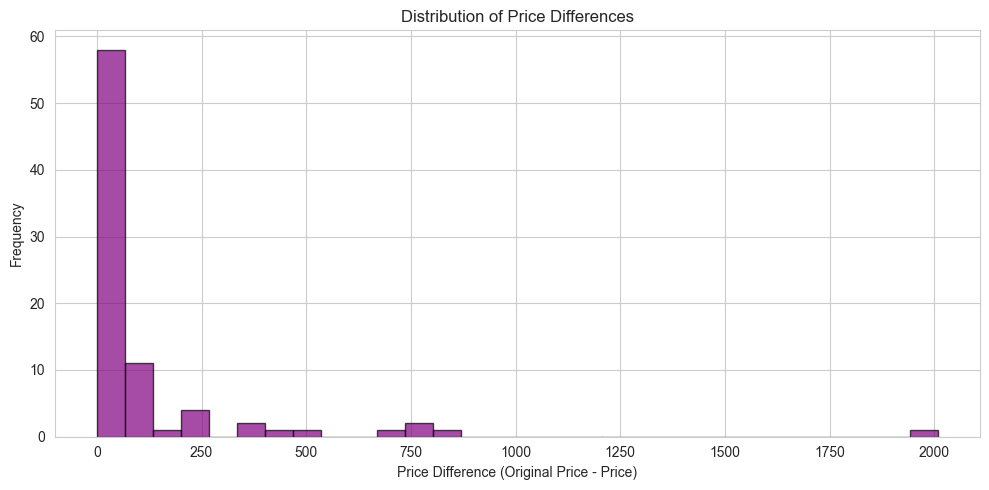

count      83.000000
mean      113.300723
std       278.331444
min         0.000000
25%         0.000000
50%         0.000000
75%        75.000000
max      2009.010000
Name: price_difference, dtype: float64


In [9]:
df["price"] = pd.to_numeric(df["price"], errors="coerce")
df["original_price"] = pd.to_numeric(df["original_price"], errors="coerce")

# Create a new column for the absolute price difference (discount)
df["price_difference"] = df["original_price"] - df["price"]

# --- ⿢ Plot a histogram of the price differences ---
plt.figure(figsize=(10, 5))
plt.hist(df["price_difference"].dropna(), bins=30, color="purple", edgecolor="black", alpha=0.7)
plt.xlabel("Price Difference (Original Price - Price)")
plt.ylabel("Frequency")
plt.title("Distribution of Price Differences")
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

# Print basic statistics of price differences for reference
print(df["price_difference"].describe())

In [10]:
df["discount_percentage"] = pd.to_numeric(df["discount_percentage"], errors="coerce")

# --- ⿡ Sort the dataset by discount_percentage in descending order ---
df_sorted = df.sort_values(by="discount_percentage", ascending=False)

# --- ⿢ Display the top 5 deals with the highest discounts ---
top_5_deals = df_sorted.head(5)

# Display the top 5 deals
print("Top 5 Deals with the Highest Discounts:")
print(top_5_deals[["title", "price", "original_price", "discount_percentage"]])

# Optionally, you can display the top 5 deals in a more readable format, e.g., as a table
top_5_deals_display = top_5_deals[["title", "price", "original_price", "discount_percentage"]]
top_5_deals_display

Top 5 Deals with the Highest Discounts:
                                                title   price  original_price  \
26  2019 Apple MacBook Pro 16" i7 2.6GHz/16GB/512G...  389.99         2399.00   
80  Arlo VMC4350P-100NAR Pro 4 Spotlight Camera 3 ...  113.99          499.99   
14  Proscan 10.1" Tablet/Portable DVD Combo 2GB/32...   37.99          139.99   
4   Sony WH-CH720N Noise Canceling Wireless Headph...   49.99          149.99   
40  2021 Apple iPad Pro 5 128GB WiFi Only 12.9" - ...  426.40         1099.00   

    discount_percentage  
26                83.74  
80                77.20  
14                72.86  
4                 66.67  
40                61.20  


,title,price,original_price,discount_percentage
26,"2019 Apple MacBook Pro 16"" i7 2.6GHz/16GB/512G...",389.99,2399.00,83.74
80,Arlo VMC4350P-100NAR Pro 4 Spotlight Camera 3 ...,113.99,499.99,77.20
14,"Proscan 10.1"" Tablet/Portable DVD Combo 2GB/32...",37.99,139.99,72.86
4,Sony WH-CH720N Noise Canceling Wireless Headph...,49.99,149.99,66.67
40,"2021 Apple iPad Pro 5 128GB WiFi Only 12.9"" - ...",426.40,1099.00,61.20
